In [1]:
import imageio

# Lire une image
damier = imageio.imread("damier-ng.jpeg")

# Sauvegarder l'image dans un nouveau format
imageio.imsave("damier-ng.png", damier)


C:\Users\zaebo\AppData\Local\Temp\ipykernel_36248\2970189593.py:4: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  damier = imageio.imread("damier-ng.jpeg")


C:\Users\zaebo\AppData\Local\Temp\ipykernel_36248\2028044083.py:6: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  damier = imageio.imread("damier-ng.jpeg")


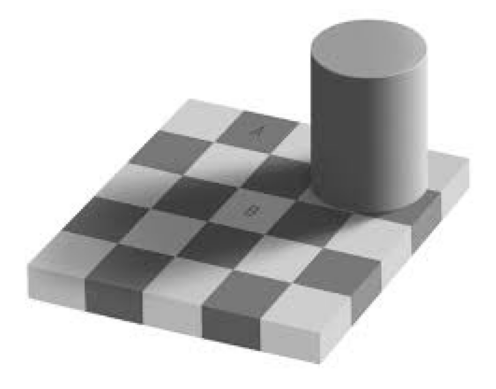

In [2]:
import numpy as np
import imageio
import matplotlib.pyplot as plt

# Lire une image
damier = imageio.imread("damier-ng.jpeg")

# Afficher l'image
plt.imshow(damier)
plt.axis('off')  # Pour ne pas afficher les axes
plt.show()


In [3]:
import numpy as np
import imageio

# Lire une image
paysage = imageio.imread("paysage_zen.png")

# Afficher les dimensions de l'image
print(paysage.shape)


(432, 1426, 3)


C:\Users\zaebo\AppData\Local\Temp\ipykernel_36248\1173281334.py:5: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  paysage = imageio.imread("paysage_zen.png")


C:\Users\zaebo\AppData\Local\Temp\ipykernel_36248\1622751684.py:26: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(nom_image)


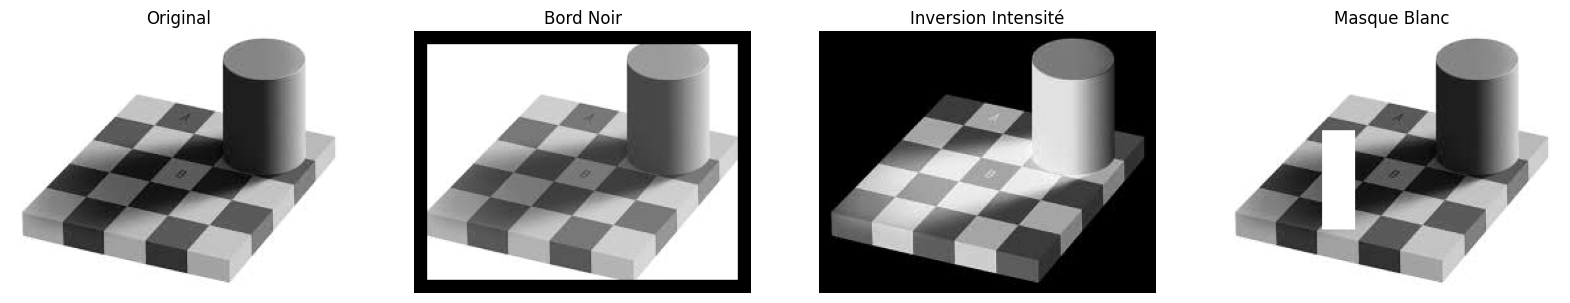

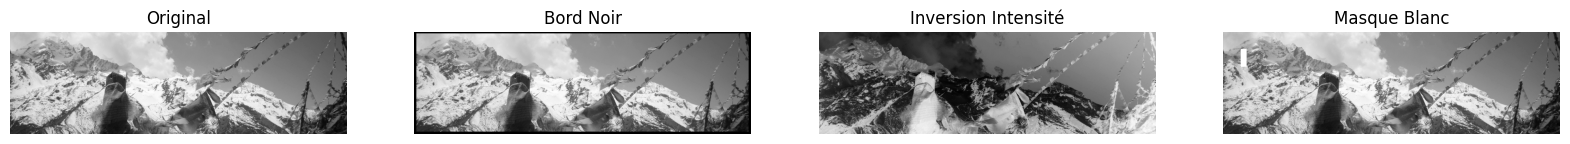

In [4]:
import imageio
import matplotlib.pyplot as plt
import numpy as np

# Fonctions de transformation
def ajouter_bord_noir(image, k):
    image[:k, :] = 0
    image[-k:, :] = 0
    image[:, :k] = 0
    image[:, -k:] = 0
    return image

def inverser_intensite(image):
    return 255 - image

def poser_masque_blanc(image, x, y, L, H):
    image[x:x+L, y:y+H] = 255
    return image

# Liste des noms d'images
noms_images = ["damier-ng.png", "paysage_zen.png"]

# Appliquer les modifications pour chaque image
for nom_image in noms_images:
    # Charger l'image
    image = imageio.imread(nom_image)
    
    # Vérifier si l'image est en couleur ou en niveaux de gris
    if image.ndim == 3 and image.shape[2] == 3:  # Image couleur sans canal alpha
        image_gris = np.mean(image, axis=2).astype(np.uint8)  # Convertir en niveaux de gris
    elif image.ndim == 2 or (image.ndim == 3 and image.shape[2] == 1):  # Niveaux de gris
        image_gris = image
    else:  # Image couleur avec canal alpha
        image_gris = np.mean(image[:, :, :3], axis=2).astype(np.uint8)  # Ignorer le canal alpha
    
    # Appliquer les transformations
    image_bord_noir = ajouter_bord_noir(image_gris.copy(), 10)
    image_inversee = inverser_intensite(image_gris.copy())
    image_masque_blanc = poser_masque_blanc(image_gris.copy(), 75, 75, 75, 25)
    
    # Afficher les images modifiées
    fig, axs = plt.subplots(1, 4, figsize=(20, 5))
    axs[0].imshow(image_gris, cmap='gray')
    axs[0].set_title('Original')
    axs[0].axis('off')
    
    axs[1].imshow(image_bord_noir, cmap='gray')
    axs[1].set_title('Bord Noir')
    axs[1].axis('off')
    
    axs[2].imshow(image_inversee, cmap='gray')
    axs[2].set_title('Inversion Intensité')
    axs[2].axis('off')
    
    axs[3].imshow(image_masque_blanc, cmap='gray')
    axs[3].set_title('Masque Blanc')
    axs[3].axis('off')
    
    plt.show()


C:\Users\zaebo\AppData\Local\Temp\ipykernel_36248\1933527672.py:11: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  damier = imageio.imread("damier-ng.jpeg")
C:\Users\zaebo\AppData\Local\Temp\ipykernel_36248\1933527672.py:12: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  paysage = imageio.imread("paysage_zen.png")


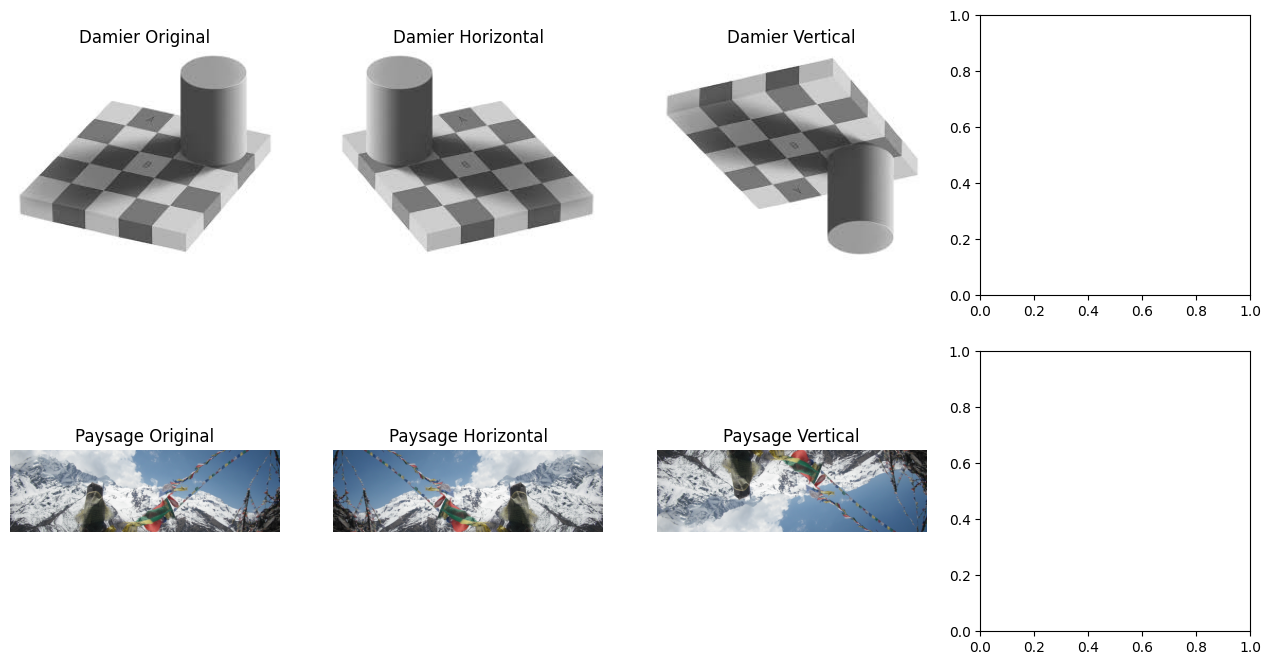

In [5]:
def effet_miroir(image, orientation='horizontal'):
    if orientation == 'horizontal':
        return image[:, ::-1]
    else:  # orientation == 'vertical'
        return image[::-1, :]

import imageio
import matplotlib.pyplot as plt

# Charger les images
damier = imageio.imread("damier-ng.jpeg")
paysage = imageio.imread("paysage_zen.png")

# Appliquer l'effet miroir
damier_horizontal = effet_miroir(damier, 'horizontal')
damier_vertical = effet_miroir(damier, 'vertical')
paysage_horizontal = effet_miroir(paysage, 'horizontal')
paysage_vertical = effet_miroir(paysage, 'vertical')

# Afficher les images
fig, axs = plt.subplots(2, 4, figsize=(16, 8))

# Damier original et effet miroir
axs[0, 0].imshow(damier)
axs[0, 0].set_title('Damier Original')
axs[0, 0].axis('off')

axs[0, 1].imshow(damier_horizontal)
axs[0, 1].set_title('Damier Horizontal')
axs[0, 1].axis('off')

axs[0, 2].imshow(damier_vertical)
axs[0, 2].set_title('Damier Vertical')
axs[0, 2].axis('off')

# Paysage original et effet miroir
axs[1, 0].imshow(paysage)
axs[1, 0].set_title('Paysage Original')
axs[1, 0].axis('off')

axs[1, 1].imshow(paysage_horizontal)
axs[1, 1].set_title('Paysage Horizontal')
axs[1, 1].axis('off')

axs[1, 2].imshow(paysage_vertical)
axs[1, 2].set_title('Paysage Vertical')
axs[1, 2].axis('off')

plt.show()


C:\Users\zaebo\AppData\Local\Temp\ipykernel_36248\482539977.py:41: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread('paysage_zen.png')


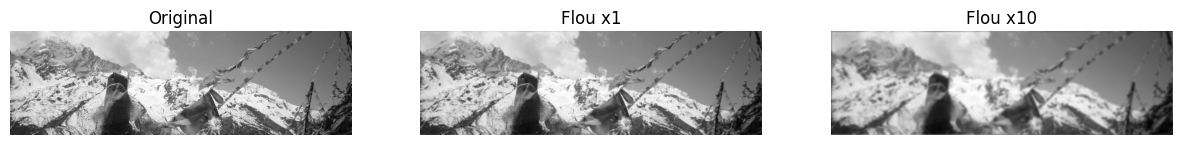

In [6]:
import numpy as np
from scipy.signal import convolve2d
import imageio
import matplotlib.pyplot as plt

def filtrer(im, K):
    """
    Applique une convolution 2D à une image avec un kernel spécifié.
    
    :param im: Image en niveaux de gris (2D).
    :param K: Kernel de convolution (2D).
    :return: Image filtrée.
    """
    # Assurez-vous que l'image est en 2D
    if im.ndim > 2:
        im = np.mean(im[..., :3], axis=2)
    return convolve2d(im, K, mode='same', boundary='wrap')

def appliquer_flou_multiple(im, K, iterations=1):
    """
    Applique un filtre de flou à une image plusieurs fois.
    
    :param im: Image en niveaux de gris (2D).
    :param K: Kernel de convolution (2D).
    :param iterations: Nombre d'itérations du filtre.
    :return: Image floutée.
    """
    image_filtree = im.copy()
    for _ in range(iterations):
        image_filtree = filtrer(image_filtree, K)
    return image_filtree

# Définir le kernel de floutage K
K = np.array([[1, 2, 4, 2, 1],
              [2, 4, 8, 4, 2],
              [4, 8, 16, 8, 4],
              [2, 4, 8, 4, 2],
              [1, 2, 4, 2, 1]]) / 100

# Charger une image
image = imageio.imread('paysage_zen.png')

# Convertir l'image en niveaux de gris si nécessaire
if image.ndim == 3:
    image_gris = np.mean(image[..., :3], axis=2)
else:
    image_gris = image

# Appliquer le flou
iterations_flou = 10  # Nombre de fois que le filtre sera appliqué pour augmenter le flou
image_floutee_multiple = appliquer_flou_multiple(image_gris, K, iterations_flou)

# Afficher les résultats
plt.figure(figsize=(15, 7))
plt.subplot(131), plt.imshow(image_gris, cmap='gray'), plt.title('Original')
plt.axis('off')
plt.subplot(132), plt.imshow(filtrer(image_gris, K), cmap='gray'), plt.title('Flou x1')
plt.axis('off')
plt.subplot(133), plt.imshow(image_floutee_multiple, cmap='gray'), plt.title(f'Flou x{iterations_flou}')
plt.axis('off')
plt.show()


C:\Users\zaebo\AppData\Local\Temp\ipykernel_36248\420783437.py:41: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread('paysage_zen.png')


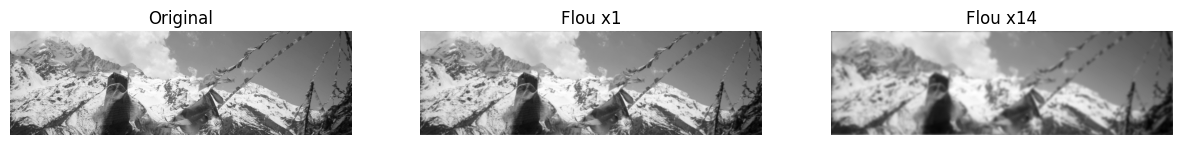

In [8]:
import numpy as np
from scipy.signal import convolve2d
import imageio
import matplotlib.pyplot as plt

def filtrer(im, K):
    """
    Applique une convolution 2D à une image avec un kernel spécifié.
    
    :param im: Image en niveaux de gris (2D).
    :param K: Kernel de convolution (2D).
    :return: Image filtrée.
    """
    # Assurez-vous que l'image est en 2D
    if im.ndim > 2:
        im = np.mean(im[..., :3], axis=2)
    return convolve2d(im, K, mode='same', boundary='wrap')

def appliquer_flou_multiple(im, K, iterations=1):
    """
    Applique un filtre de flou à une image plusieurs fois.
    
    :param im: Image en niveaux de gris (2D).
    :param K: Kernel de convolution (2D).
    :param iterations: Nombre d'itérations du filtre.
    :return: Image floutée.
    """
    image_filtree = im.copy()
    for _ in range(iterations):
        image_filtree = filtrer(image_filtree, K)
    return image_filtree

# Définir le kernel de floutage K
K = np.array([[1, 2, 4, 2, 1],
              [2, 4, 8, 4, 2],
              [4, 8, 16, 8, 4],
              [2, 4, 8, 4, 2],
              [1, 2, 4, 2, 1]]) / 100

# Charger une image
image = imageio.imread('paysage_zen.png')

# Convertir l'image en niveaux de gris si nécessaire
if image.ndim == 3:
    image_gris = np.mean(image[..., :3], axis=2)
else:
    image_gris = image

# Appliquer le flou
iterations_flou = 14  # Nombre de fois que le filtre sera appliqué pour augmenter le flou
image_floutee_multiple = appliquer_flou_multiple(image_gris, K, iterations_flou)

# Afficher les résultats
plt.figure(figsize=(15, 7))
plt.subplot(131), plt.imshow(image_gris, cmap='gray'), plt.title('Original')
plt.axis('off')
plt.subplot(132), plt.imshow(filtrer(image_gris, K), cmap='gray'), plt.title('Flou x1')
plt.axis('off')
plt.subplot(133), plt.imshow(image_floutee_multiple, cmap='gray'), plt.title(f'Flou x{iterations_flou}')
plt.axis('off')
plt.show()


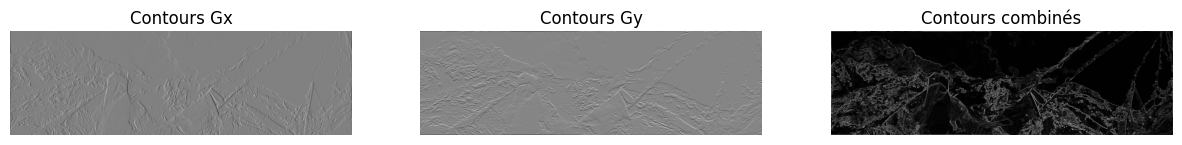

In [ ]:
# Kernels pour l'extraction de contours
Gx = np.array([[-1, 0, 1],
               [-2, 0, 2],
               [-1, 0, 1]])

Gy = np.array([[-1, -2, -1],
               [0, 0, 0],
               [1, 2, 1]])

# Appliquer les kernels Gx et Gy pour extraire les contours
contours_x = filtrer(image, Gx)
contours_y = filtrer(image, Gy)
contours = np.sqrt(contours_x**2 + contours_y**2)

# Afficher les résultats
plt.figure(figsize=(15, 5))
plt.subplot(131), plt.imshow(contours_x, cmap='gray'), plt.title('Contours Gx')
plt.axis('off')
plt.subplot(132), plt.imshow(contours_y, cmap='gray'), plt.title('Contours Gy')
plt.axis('off')
plt.subplot(133), plt.imshow(contours, cmap='gray'), plt.title('Contours combinés')
plt.axis('off')
plt.show()


C:\Users\zaebo\AppData\Local\Temp\ipykernel_33644\2175982812.py:16: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image_apparente = imageio.imread("paysage_zen.png")


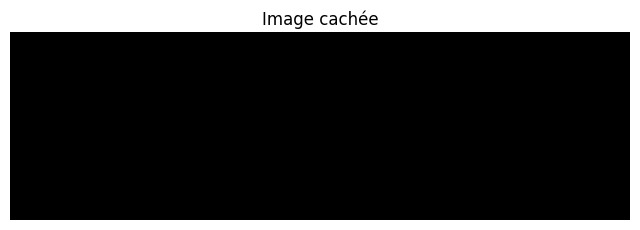

In [ ]:
import numpy as np
import imageio
import matplotlib.pyplot as plt

def decoder_steganographie_revisée(image):
    # Isoler les 4 bits de poids faible et les décaler à la position des bits de poids fort
    image_cachee = (image & 0x0F) << 4
    
    # Étendre le contraste pour rendre l'image cachée plus visible
    image_cachee = np.clip(image_cachee * 16, 0, 255)  # Multiplier par 16 pour étendre le contraste
    
    return image_cachee.astype(np.uint8)


# Charger l'image apparente
image_apparente = imageio.imread("paysage_zen.png")

# Décoder l'image cachée
image_cachee = decoder_steganographie_revisée(image_apparente)

# Afficher l'image cachée
plt.figure(figsize=(8, 8))
plt.imshow(image_cachee)
plt.title('Image cachée')
plt.axis('off')
plt.show()


C:\Users\zaebo\AppData\Local\Temp\ipykernel_33644\3318939480.py:14: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image_apparente = imageio.imread("paysage_zen.png")
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


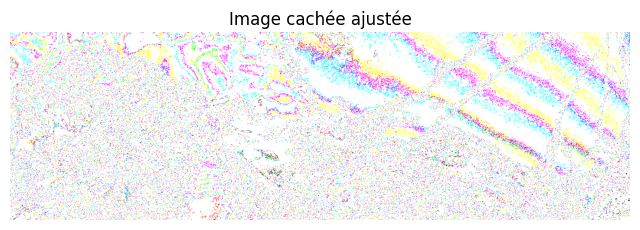

In [ ]:
def decoder_steganographie_ajustee(image):
    # Isoler les 4 bits de poids faible et les décaler à la position des bits de poids fort
    image_cachee = (image & 0x0F) << 4

    # Convertir l'image résultante pour éviter les problèmes de type de données
    image_cachee = image_cachee.astype(np.uint8)

    # Tentative d'ajuster le contraste et la luminosité pour améliorer la visibilité
    # Cela pourrait nécessiter des ajustements fins en fonction de l'image spécifique
    image_cachee = np.interp(image_cachee, (image_cachee.min(), image_cachee.max()), (0, 255))

    return image_cachee

image_apparente = imageio.imread("paysage_zen.png")
image_cachee = decoder_steganographie_ajustee(image_apparente)

plt.figure(figsize=(8, 8))
plt.imshow(image_cachee, cmap='gray')  # Utilisez cmap='gray' pour les images en niveaux de gris
plt.title('Image cachée ajustée')
plt.axis('off')
plt.show()


C:\Users\zaebo\AppData\Local\Temp\ipykernel_36248\831034747.py:20: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread('paysage_zen.png')


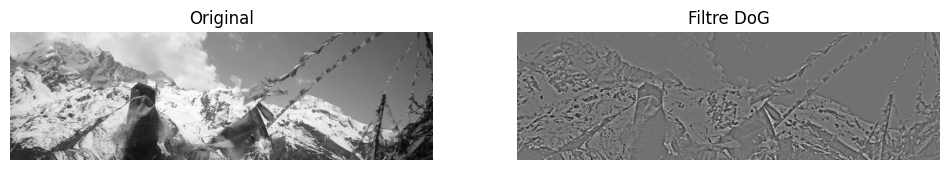

In [11]:
from scipy.ndimage import gaussian_filter
import numpy as np
import imageio
import matplotlib.pyplot as plt

def filtre_dog(image, sigma1, sigma2):
    """
    Applique un filtre Difference of Gaussians (DoG) à une image.
    
    :param image: Image en niveaux de gris (2D) ou couleur.
    :param sigma1: Écart-type pour le premier flou gaussien.
    :param sigma2: Écart-type pour le second flou gaussien.
    :return: Image résultante après application du filtre DoG.
    """
    flou1 = gaussian_filter(image, sigma=sigma1)
    flou2 = gaussian_filter(image, sigma=sigma2)
    return flou1 - flou2

# Charger une image et la convertir en niveaux de gris si nécessaire
image = imageio.imread('paysage_zen.png')
if image.ndim == 3:
    image_gris = np.mean(image[..., :3], axis=2)
else:
    image_gris = image

# Paramètres pour le filtre DoG
sigma1 = 1
sigma2 = 5

# Appliquer le filtre DoG
image_dog = filtre_dog(image_gris, sigma1, sigma2)

# Afficher les résultats
plt.figure(figsize=(12, 6))
plt.subplot(121), plt.imshow(image_gris, cmap='gray'), plt.title('Original')
plt.axis('off')
plt.subplot(122), plt.imshow(image_dog, cmap='gray'), plt.title('Filtre DoG')
plt.axis('off')
plt.show()
